#### 딥러닝이란?
- 인간의 신경망을 모방하여, 학습하고 예측하는 기술
- 대량의 데이터에서 복잡한 패턴이나 규칙을 찾아내는 능력이 뛰어남
- 인간의 뉴런 == 선형모델 (y = wx + b)

In [ ]:
# TensorFlow : 구글이 만든 딥러닝 프레임워크

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/MyDrive/Colab Notebooks/인사교_머신러닝/DL (딥러닝)

/content/drive/MyDrive/Colab Notebooks/인사교_머신러닝/DL (딥러닝)


In [4]:
!pwd

/content/drive/MyDrive/Colab Notebooks/인사교_머신러닝/DL (딥러닝)


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv("./data/student-mat.csv", delimiter=";")
data.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10


### 목표
- 공부시간에 따른 학생의 성적을 예측하는 회귀 모델 만들기!
   - ML과 DL 사용법 차이 확인해보기!

| 컬럼 이름       | 설명                             |
|-----------------|----------------------------------|
| school          | 학교 (GP - Gabriel Pereira, MS - Mousinho da Silveira) |
| sex             | 성별 (F - Female, M - Male)      |
| age             | 나이                             |
| address         | 주소 유형 (U - Urban, R - Rural) |
| famsize         | 가족 크기 (LE3 - 3명 이하, GT3 - 3명 초과) |
| Pstatus         | 부모 동거 상태 (T - 함께, A - 별거) |
| Medu            | 어머니 교육 수준 (0 - 없음, 1 - 초등, 2 - 중등, 3 - 고등, 4 - 대졸) |
| Fedu            | 아버지 교육 수준 (0 - 없음, 1 - 초등, 2 - 중등, 3 - 고등, 4 - 대졸) |
| Mjob            | 어머니 직업 (teacher, health, services, at_home, other) |
| Fjob            | 아버지 직업 (teacher, health, services, at_home, other) |
| reason          | 학교 선택 이유 (home, reputation, course, other) |
| guardian        | 보호자 (mother, father, other)  |
| traveltime      | 통학 시간 (1 - 15분 이하, 2 - 15~30분, 3 - 30분~1시간, 4 - 1시간 초과) |
| studytime       | 주간 공부 시간 (1 - 2시간 이하, 2 - 2~5시간, 3 - 5~10시간, 4 - 10시간 초과) |
| failures        | 과목 낙제 수 (n if 1<=n<3, else 4) |
| schoolsup       | 학교 추가 지원 (yes, no)        |
| famsup          | 가족 추가 지원 (yes, no)        |
| paid            | 과외 수업 참여 (yes, no)        |
| activities      | 학교 외 활동 참여 (yes, no)     |
| nursery         | 유치원 참여 여부 (yes, no)      |
| higher          | 고등교육 희망 여부 (yes, no)    |
| internet        | 가정 내 인터넷 접속 여부 (yes, no) |
| romantic        | 로맨틱 관계 여부 (yes, no)      |
| famrel          | 가족 관계의 질 (1 - 매우 나쁨, 5 - 매우 좋음) |
| freetime        | 여가 시간의 양 (1 - 매우 적음, 5 - 매우 많음) |
| goout           | 외출 빈도 (1 - 매우 적음, 5 - 매우 많음) |
| Dalc            | 평일 음주량 (1 - 매우 적음, 5 - 매우 많음) |
| Walc            | 주말 음주량 (1 - 매우 적음, 5 - 매우 많음) |
| health          | 현재 건강 상태 (1 - 매우 나쁨, 5 - 매우 좋음) |
| absences        | 결석 일수                        |
| G1              | 1학기 성적                       |
| G2              | 2학기 성적                       |
| G3              | 최종 성적                        |


In [8]:
# 데이터 정보 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

#### X(문제), y(정답) 분리
- X : studytime
- y : G3

In [47]:
X = data[["studytime"]]
y = data["G3"]

In [48]:
X.shape, y.shape

((395, 1), (395,))

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=2024)

In [50]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((276, 1), (119, 1), (276,), (119,))

#### ML(sklearn)과 DL(tensorflow, keras) 모델링 비교
- ML(skearn)
  - 모델 생성 (완성된 객체 초기화) -> 학습 -> 예측 -> 평가
  - ex. 완제품 로봇에서 도색(하이퍼 파라미터)하는 느낌
---
- DL(tensorflow)
  - 모델 생성(모델을 직접 구성) -> 학습 -> 예측 -> 평가
  - ex.레고로 만드는 조립식 로봇 느낌

##### 머신러닝


In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [40]:
linear_reg = LinearRegression() # 모델 초기화
linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)

print(f"평균제곱오차 : {mean_squared_error(y_test, y_pred)}")

평균제곱오차 : 20.016225192861874


##### 딥러닝

In [51]:
from tensorflow.keras.models import Sequential # 뼈대
from tensorflow.keras.layers import InputLayer, Dense # 입력층, 완전연결층(중간층, 출력층)

In [52]:
# 1. 신경만 구조 설계

# 뼈대 생성
model = Sequential()

# 입력층
model.add(InputLayer(shape = (1, ))) # 여기서는 특성의 개수를 1로 설정

# 중간층
# model.add(Dense(units = 64, activation = "sigmoid"))
# model.add(Dense(units = 32, activation = "sigmoid"))
model.add(Dense(units = 64, activation = "relu"))
model.add(Dense(units = 32, activation = "relu"))

# 출력층
model.add(Dense(units = 1))

In [53]:
# 2. 신경망 학습 방법
model.compile(
    loss = "mean_squared_error", # 오차값 뽑아주는 도구(손실함수)
#   optimizer = "SGD", # 최적화 함수(경사하강법 종류 지정)
    optimizer = "adam",
    metrics = ["mse"] # 최종평가지표
)

In [54]:
# 3. 모델 학습
h = model.fit(X_train, y_train,
              validation_split = 0.2, # train set에서 20%를 검증 데이터셋으로 사용
              epochs = 20)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 128.9642 - mse: 128.9642 - val_loss: 134.2365 - val_mse: 134.2365
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 123.3538 - mse: 123.3538 - val_loss: 129.3774 - val_mse: 129.3774
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 121.3424 - mse: 121.3424 - val_loss: 124.7515 - val_mse: 124.7515
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 108.7171 - mse: 108.7171 - val_loss: 120.3787 - val_mse: 120.3787
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 103.1250 - mse: 103.1250 - val_loss: 116.0694 - val_mse: 116.0694
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 102.6843 - mse: 102.6843 - val_loss: 111.6200 - val_mse: 111.6200
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 97.5676 - mse: 97.5676 - val_loss: 106.0108 - val_mse: 106.0108
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 93.7664 - mse: 93.7664 - val_loss: 99.5898 - val_mse: 99.5898
Epoch 9/20
7/7 ━━━━━━━━━━━━

In [55]:
# 4. 예측, 평가
model.evaluate(X_test, y_test) # sklearn의 score랑 비슷

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 24.0972 - mse: 24.0972 


[25.35370635986328, 25.35370635986328]

In [56]:
h.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

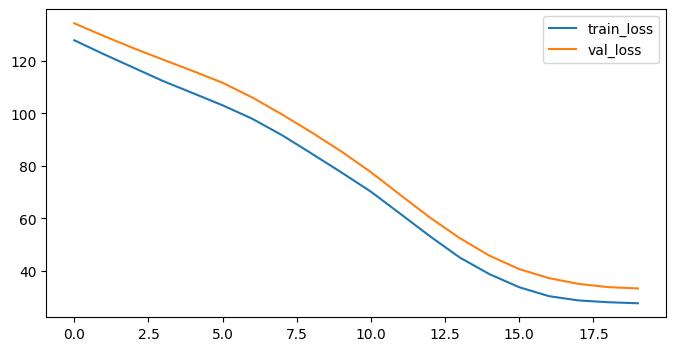

In [57]:
# 모델 복잡도 곡선(학습결과 시각화!)

plt.figure(figsize = (8, 4))
plt.plot(h.history["loss"], label = "train_loss")
plt.plot(h.history["val_loss"], label = "val_loss")
plt.legend()

plt.show()

#### 문제데이터 4ea으로 학습시키기!
- traveltime, studytime, freetime, health

In [58]:
X = data[["studytime", "traveltime", "freetime", "health"]]
y = data["G3"]

In [59]:
X.shape, y.shape

((395, 4), (395,))

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=2024)

In [61]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((276, 4), (119, 4), (276,), (119,))

In [65]:
# 1. 신경만 구조 설계

# 뼈대 생성
model = Sequential()

# 입력층
model.add(InputLayer(shape = (4, ))) # 여기서는 특성의 개수를 4로 설정

# 중간층 -> units(노드) 수는 "항아리모양"이 일반적인 경험에 의해 가장 좋음!
model.add(Dense(units = 64, activation = "relu"))
model.add(Dense(units = 64, activation = "relu"))
model.add(Dense(units = 128, activation = "relu"))
model.add(Dense(units = 64, activation = "relu"))
model.add(Dense(units = 32, activation = "relu"))
# 출력층
model.add(Dense(units = 1))

In [66]:
# 2. 신경망 학습 방법
model.compile(
    loss = "mean_squared_error", # 오차값 뽑아주는 도구(손실함수)
#   optimizer = "SGD", # 최적화 함수(경사하강법 종류 지정)
    optimizer = "adam",
    metrics = ["mse"] # 최종평가지표
)

In [67]:
# 3. 모델 학습
h = model.fit(X_train, y_train,
              validation_split = 0.2, # train set에서 20%를 검증 데이터셋으로 사용
              epochs = 20)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 113.4568 - mse: 113.4568 - val_loss: 85.2557 - val_mse: 85.2557
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 63.7363 - mse: 63.7363 - val_loss: 38.0127 - val_mse: 38.0127
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 30.0280 - mse: 30.0280 - val_loss: 31.1888 - val_mse: 31.1888
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 30.1594 - mse: 30.1594 - val_loss: 26.3678 - val_mse: 26.3678
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 22.0622 - mse: 22.0622 - val_loss: 28.7132 - val_mse: 28.7132
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 22.9643 - mse: 22.9643 - val_loss: 26.8991 - val_mse: 26.8991
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 20.3804 - mse: 20.3804 - val_loss: 25.8669 - val_mse: 25.8669
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 23.0042 - mse: 23.0042 - val_loss: 26.0280 - val_mse: 26.0280
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/ste

In [68]:
# 4. 예측, 평가
model.evaluate(X_test, y_test) # sklearn의 score랑 비슷

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 20.8728 - mse: 20.8728 


[23.66057014465332, 23.66057014465332]

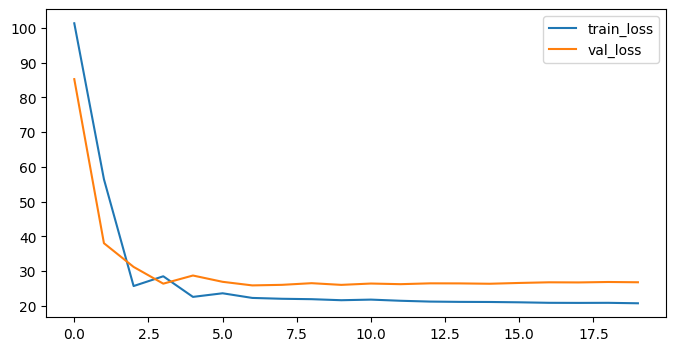

In [69]:
# 모델 복잡도 곡선(학습결과 시각화!)

plt.figure(figsize = (8, 4))
plt.plot(h.history["loss"], label = "train_loss")
plt.plot(h.history["val_loss"], label = "val_loss")
plt.legend()

plt.show()